

### This is file collects results outputted by the other 6 test files that are dumped into obj/ directory and generate meaningful stats/plots



In [ ]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from helper.helper import *
from sklearn import preprocessing

In [ ]:
cnn_stats = load_obj("regularcnnstats")
simp_stats = load_obj("simplecnnstats")
simp2_stats = load_obj("simplecnnexpanded2stats")
simp3_stats = load_obj("simplecnnexpanded3stats")
vgg_stats = load_obj("vgg16stats")
robust_stats = load_obj("robustvgg16stats")

In [ ]:
cnn_model = keras.models.load_model("./Models/regular_cnn.h5")
vgg_model = keras.models.load_model("./Models/vgg16.h5")
robust_model = keras.models.load_model("./Models/robust_vgg16.h5")
simp_model = keras.models.load_model("./Models/simple_cnn.h5")
simp2_model = keras.models.load_model("./Models/simple_cnn_expanded2.h5")
simp3_model = keras.models.load_model("./Models/simple_cnn_expanded3.h5")

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 100)       2800      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 100)       400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 100)       90100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 100)       400       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        45050     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 50)        2

In [ ]:
vgg_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_52 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
robust_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_72 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_52 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_73 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
simp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 75)        2100      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 75)        300       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 50)        33800     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 50)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 50)        22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 50)        2

In [ ]:
simp2_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 75)        2100      
_________________________________________________________________
batch_normalization_15 (Batc (None, 64, 64, 75)        300       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 50)        33800     
_________________________________________________________________
batch_normalization_16 (Batc (None, 64, 64, 50)        200       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 50)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 50)        22550     
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 50)       

In [ ]:
simp3_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 75)        2100      
_________________________________________________________________
batch_normalization (BatchNo (None, 96, 96, 75)        300       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 50)        33800     
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 50)        200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 50)        22550     
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 50)        2

### calculate performance withe respeect to number of parameters

In [ ]:
model_num_parameters = np.array([cnn_model.count_params(), vgg_model.count_params(), robust_model.count_params(), simp_model.count_params(), simp2_model.count_params(), simp3_model.count_params()])
def get_runtime(method):
    return np.array([np.mean(cnn_stats[method][2]),
                    np.mean(vgg_stats[method][2]),
                    np.mean(robust_stats[method][2]),
                    np.mean(simp_stats[method][2]),
                    np.mean(simp2_stats[method][2]),
                    np.mean(simp3_stats[method][2]),
                    ])

def get_distance(method):
    return np.array([np.mean(cnn_stats[method][1]),
            np.mean(vgg_stats[method][1]),
            np.mean(robust_stats[method][1]),
            np.mean(simp_stats[method][1]),
            np.mean(simp2_stats[method][1]),
            np.mean(simp3_stats[method][1]),
            ])

deepfool_runtime = get_runtime("deepfool")
fgsm_runtime = get_runtime("fgsm")
bim_runtime = get_runtime("bim")
madry_runtime = get_runtime("madry")
randomfuzz_runtime = get_runtime("randomfuzz")
MIM_runtime = get_runtime("MIM")
SPSA_runtime = get_runtime("SPSA")
CW_runtime = get_runtime("CW")
pixelfuzz_runtime = get_runtime("pixelfuzz")



deepfool_distance = get_distance("deepfool")
fgsm_distance = get_distance("fgsm")
bim_distance = get_distance("bim")
madry_distance = get_distance("madry")
randomfuzz_distance = get_distance("randomfuzz")
MIM_distance = get_distance("MIM")
SPSA_distance = get_distance("SPSA")
CW_distance = get_distance("CW")
pixelfuzz_distance = get_distance("pixelfuzz")

In [ ]:
index = np.argsort(model_num_parameters)
print(model_num_parameters)
print(model_num_parameters[index])
print("the plotted points from left to right are [simp1,cnn,simp2,simp3,vgg,robust]")


[ 1870210 15395914 15395914   926660  3326660  7326660]
[  926660  1870210  3326660  7326660 15395914 15395914]
the plotted points from left to right are [simp1,cnn,simp2,simp3,vgg,robust]


### Runtime

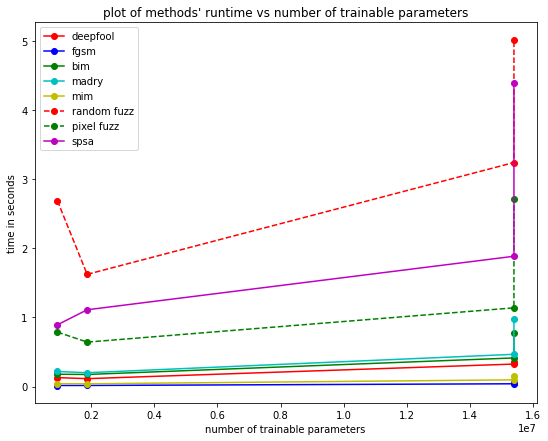

In [ ]:

index = [3,0,1,2]
plt.figure(figsize=(9, 7))
plt.plot(model_num_parameters[index], deepfool_runtime[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(model_num_parameters[index], fgsm_runtime[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(model_num_parameters[index], bim_runtime[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(model_num_parameters[index], madry_runtime[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(model_num_parameters[index], MIM_runtime[index], linestyle='-', marker='o', color="y", label = "mim")
plt.plot(model_num_parameters[index], randomfuzz_runtime[index], linestyle='--', marker='o', color="r", label = "random fuzz")
plt.plot(model_num_parameters[index], pixelfuzz_runtime[index], linestyle='--', marker='o', color="g", label = "pixel fuzz")
plt.plot(model_num_parameters[index], SPSA_runtime[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.title("plot of methods' runtime vs number of trainable parameters")
plt.ylabel("time in seconds")
plt.xlabel("number of trainable parameters")
plt.legend()
plt.show()

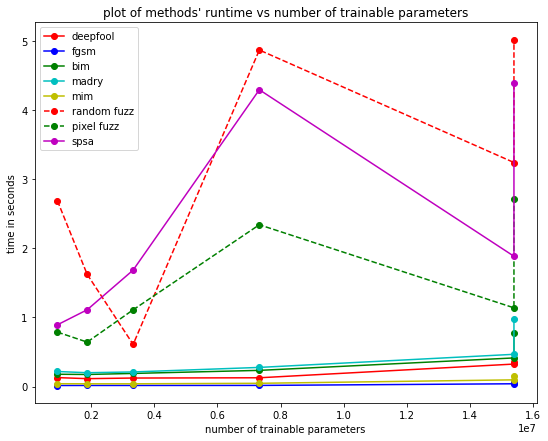

In [ ]:
index = np.argsort(model_num_parameters)
# index = [3,0,1,2]
# index = [3,4,5]
plt.figure(figsize=(9, 7))
plt.plot(model_num_parameters[index], deepfool_runtime[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(model_num_parameters[index], fgsm_runtime[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(model_num_parameters[index], bim_runtime[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(model_num_parameters[index], madry_runtime[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(model_num_parameters[index], MIM_runtime[index], linestyle='-', marker='o', color="y", label = "mim")
plt.plot(model_num_parameters[index], randomfuzz_runtime[index], linestyle='--', marker='o', color="r", label = "random fuzz")
plt.plot(model_num_parameters[index], pixelfuzz_runtime[index], linestyle='--', marker='o', color="g", label = "pixel fuzz")
plt.plot(model_num_parameters[index], SPSA_runtime[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.title("plot of methods' runtime vs number of trainable parameters")
plt.ylabel("time in seconds")
plt.xlabel("number of trainable parameters")
plt.legend()
plt.show()

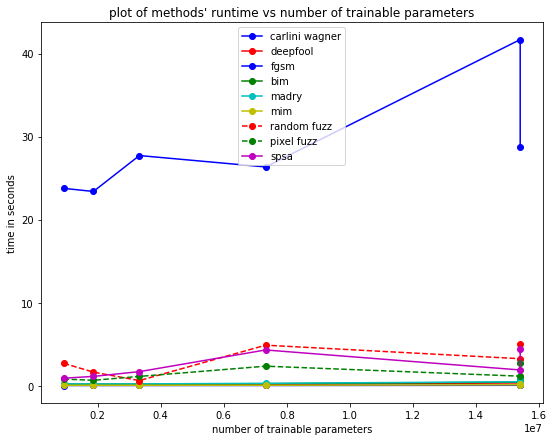

In [ ]:
index = np.argsort(model_num_parameters)
# index = [3,0,1,2]
# index = [3,4,5]
plt.figure(figsize=(9, 7))
plt.plot(model_num_parameters[index], CW_runtime[index], linestyle='-', marker='o', color="b", label = "carlini wagner")
plt.plot(model_num_parameters[index], deepfool_runtime[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(model_num_parameters[index], fgsm_runtime[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(model_num_parameters[index], bim_runtime[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(model_num_parameters[index], madry_runtime[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(model_num_parameters[index], MIM_runtime[index], linestyle='-', marker='o', color="y", label = "mim")
plt.plot(model_num_parameters[index], randomfuzz_runtime[index], linestyle='--', marker='o', color="r", label = "random fuzz")
plt.plot(model_num_parameters[index], pixelfuzz_runtime[index], linestyle='--', marker='o', color="g", label = "pixel fuzz")
plt.plot(model_num_parameters[index], SPSA_runtime[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.title("plot of methods' runtime vs number of trainable parameters")
plt.ylabel("time in seconds")
plt.xlabel("number of trainable parameters")
plt.legend()
plt.show()

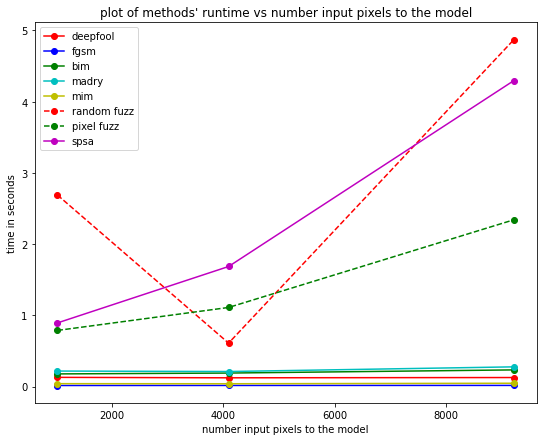

In [ ]:
index = [3,4,5]
y = np.array([32*32,64*64,96*96])
plt.figure(figsize=(9, 7))
plt.plot(y, deepfool_runtime[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(y, fgsm_runtime[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(y, bim_runtime[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(y, madry_runtime[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(y, MIM_runtime[index], linestyle='-', marker='o', color="y", label = "mim")
plt.plot(y, randomfuzz_runtime[index], linestyle='--', marker='o', color="r", label = "random fuzz")
# plt.plot(y, CW_runtime[index], linestyle='--', marker='o', color="b", label = "carlini wagner")
plt.plot(y, pixelfuzz_runtime[index], linestyle='--', marker='o', color="g", label = "pixel fuzz")
plt.plot(y, SPSA_runtime[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.title("plot of methods' runtime vs number input pixels to the model")
plt.ylabel("time in seconds")
plt.xlabel("number input pixels to the model")
plt.legend()
plt.show()

### Distance


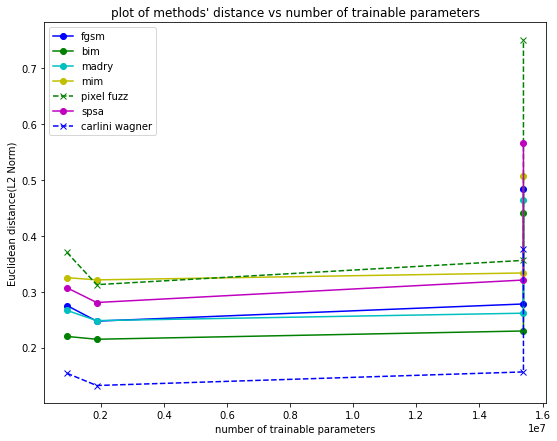

In [ ]:
index = [3,0,1,2]
plt.figure(figsize=(9, 7))
# plt.plot(model_num_parameters[index], deepfool_distance[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(model_num_parameters[index], fgsm_distance[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(model_num_parameters[index], bim_distance[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(model_num_parameters[index], madry_distance[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(model_num_parameters[index], MIM_distance[index], linestyle='-', marker='o', color="y", label = "mim")
# plt.plot(model_num_parameters[index], randomfuzz_distance[index], linestyle='--', marker='o', color="r", label = "random fuzz")
plt.plot(model_num_parameters[index], pixelfuzz_distance[index], linestyle='--', marker='x', color="g", label = "pixel fuzz")
plt.plot(model_num_parameters[index], SPSA_distance[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.plot(model_num_parameters[index], CW_distance[index], linestyle='--', marker='x', color="b", label = "carlini wagner")
plt.title("plot of methods' distance vs number of trainable parameters")
plt.ylabel("Euclidean distance(L2 Norm)")
plt.xlabel("number of trainable parameters")
plt.legend()
plt.show()

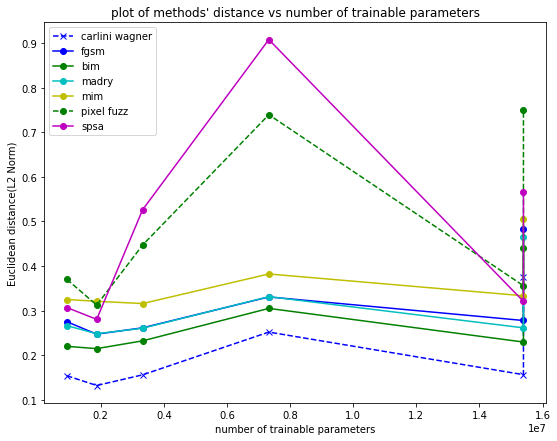

In [ ]:
index = np.argsort(model_num_parameters)
# index = [3,0,1,2]
# index = [3,4,5]
plt.figure(figsize=(9, 7))
plt.plot(model_num_parameters[index], CW_distance[index], linestyle='--', marker='x', color="b", label = "carlini wagner")
# plt.plot(model_num_parameters[index], deepfool_distance[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(model_num_parameters[index], fgsm_distance[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(model_num_parameters[index], bim_distance[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(model_num_parameters[index], madry_distance[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(model_num_parameters[index], MIM_distance[index], linestyle='-', marker='o', color="y", label = "mim")
# plt.plot(model_num_parameters[index], randomfuzz_distance[index], linestyle='--', marker='o', color="r", label = "random fuzz")
plt.plot(model_num_parameters[index], pixelfuzz_distance[index], linestyle='--', marker='o', color="g", label = "pixel fuzz")
plt.plot(model_num_parameters[index], SPSA_distance[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.title("plot of methods' distance vs number of trainable parameters")
plt.ylabel("Euclidean distance(L2 Norm)")
plt.xlabel("number of trainable parameters")
plt.legend()
plt.show()

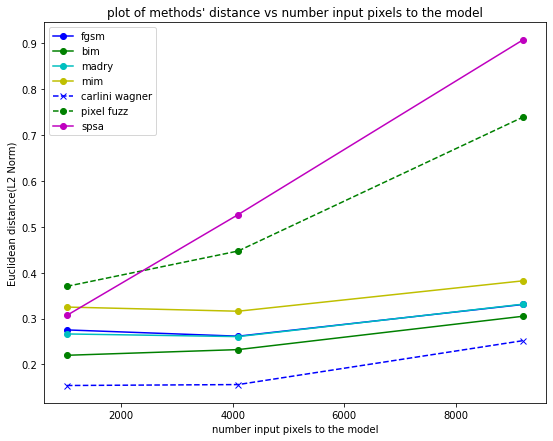

In [ ]:
index = [3,4,5]
y = np.array([32*32,64*64,96*96])
plt.figure(figsize=(9, 7))
# plt.plot(y, deepfool_distance[index], linestyle='-', marker='o', color="r", label = "deepfool")
plt.plot(y, fgsm_distance[index], linestyle='-', marker='o', color="b", label = "fgsm")
plt.plot(y, bim_distance[index], linestyle='-', marker='o', color="g", label = "bim")
plt.plot(y, madry_distance[index], linestyle='-', marker='o', color="c", label = "madry")
plt.plot(y, MIM_distance[index], linestyle='-', marker='o', color="y", label = "mim")
# plt.plot(y, randomfuzz_distance[index], linestyle='--', marker='o', color="r", label = "random fuzz")
plt.plot(y, CW_distance[index], linestyle='--', marker='x', color="b", label = "carlini wagner")
plt.plot(y, pixelfuzz_distance[index], linestyle='--', marker='o', color="g", label = "pixel fuzz")
plt.plot(y, SPSA_distance[index], linestyle='-', marker='o', color="m", label = "spsa")
plt.title("plot of methods' distance vs number input pixels to the model")
plt.ylabel("Euclidean distance(L2 Norm)")
plt.xlabel("number input pixels to the model")
plt.legend()
plt.show()

### Test Stablity



In [ ]:
def normalize(x):
    return (x - np.mean(x))/np.std(x)
#  coefficient of variation (CV), which indicates how “spread out” the members of a sample or population are relative to the mean. 
def relative_variance(x): 
    return np.var(x)/np.mean(x)

In [ ]:
["deepfool", relative_variance( vgg_stats["deepfool"][1])]

['deepfool', 9.78159746431542]

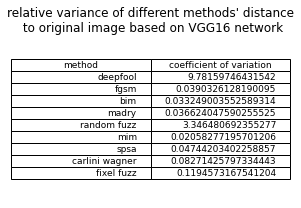

In [ ]:
table_data = [
         ["deepfool", relative_variance( vgg_stats["deepfool"][1])],
         ["fgsm", relative_variance( vgg_stats["fgsm"][1])],
         ["bim", relative_variance( vgg_stats["bim"][1])],
         ["madry", relative_variance( vgg_stats["madry"][1])],
         ["random fuzz", relative_variance( vgg_stats["randomfuzz"][1])],
         ["mim", relative_variance( vgg_stats["MIM"][1])],
         ["spsa", relative_variance( vgg_stats["SPSA"][1])],
         ["carlini wagner", relative_variance( vgg_stats["CW"][1])],
         ["fixel fuzz", relative_variance( vgg_stats["pixelfuzz"][1])],
         ]
plt.figure(figsize=(5, 3))
plt.axis('off')
plt.axis('tight')
plt.title("relative variance of different methods' distance\n to original image based on VGG16 network")
plt.table(cellText=table_data, colLabels=["method", "coefficient of variation"], loc='center')

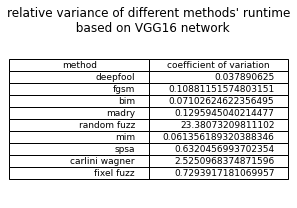

In [ ]:
table_data = [
         ["deepfool", relative_variance( vgg_stats["deepfool"][2])],
         ["fgsm", relative_variance( vgg_stats["fgsm"][2])],
         ["bim", relative_variance( vgg_stats["bim"][2])],
         ["madry", relative_variance( vgg_stats["madry"][2])],
         ["random fuzz", relative_variance( vgg_stats["randomfuzz"][2])],
         ["mim", relative_variance( vgg_stats["MIM"][2])],
         ["spsa", relative_variance( vgg_stats["SPSA"][2])],
         ["carlini wagner", relative_variance( vgg_stats["CW"][2])],
         ["fixel fuzz", relative_variance( vgg_stats["pixelfuzz"][2])],
         ]
plt.figure(figsize=(5, 3))
plt.axis('off')
plt.axis('tight')
plt.title("relative variance of different methods' runtime\n  based on VGG16 network")
plt.table(cellText=table_data, colLabels=["method", "coefficient of variation"], loc='center')
